In [1]:
import numpy as np
import cv2
import pywt
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img=cv2.imread("./test_image/SRI06425.jpg")
img.shape

(6632, 3581, 3)

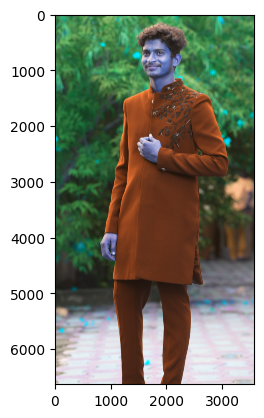

In [3]:
plt.imshow(img)

In [4]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(6632, 3581)

In [5]:
gray

array([[ 97,  97,  97, ..., 100, 101, 104],
       [ 98,  98,  97, ...,  97,  99, 101],
       [ 99,  98,  97, ...,  97,  98,  99],
       ...,
       [212, 210, 209, ..., 220, 220, 220],
       [212, 210, 209, ..., 221, 221, 221],
       [212, 211, 209, ..., 222, 222, 222]], dtype=uint8)

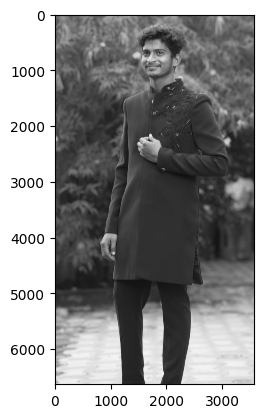

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[1403,  424,  713,  713]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(1403, 424, 713, 713)

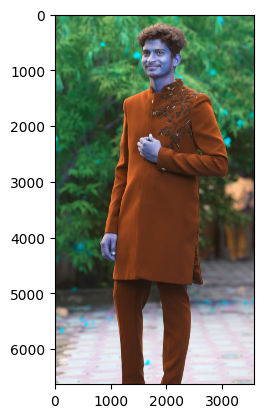

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

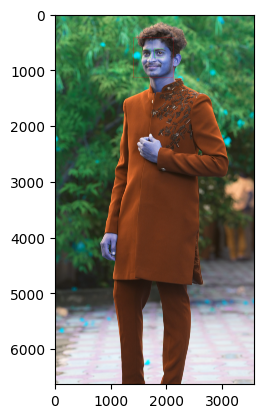

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

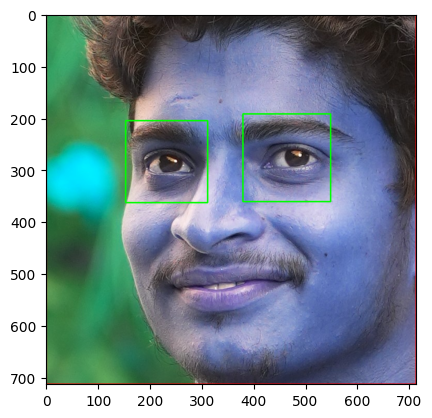

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

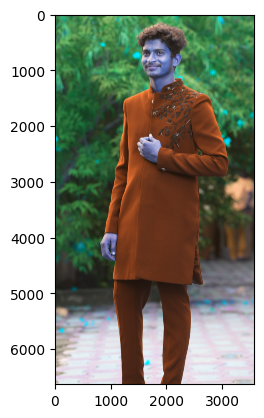

In [13]:
original_image = cv2.imread('./test_image/SRI06425.jpg')
plt.imshow(original_image)

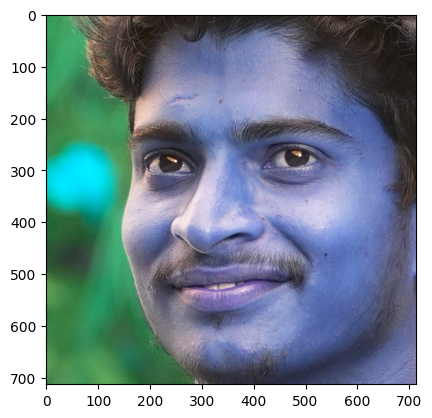

In [14]:
cropped_image = get_cropped_image_if_2_eyes('./test_image/SRI06425.jpg')
plt.imshow(cropped_image)

In [15]:
path_to_data = "./datasets/"
path_to_cr_data = "./datasets/cropped/"

In [16]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [17]:
img_dirs

['./datasets/cropped',
 './datasets/harishpics',
 './datasets/himapics',
 './datasets/saipics',
 './datasets/venkypics']

In [18]:
import shutil

if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [19]:
cropped_image_dirs = []
finends_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    finends_name = img_dir.split('/')[-1]
    print(finends_name)
    
    finends_file_names_dict[finends_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + finends_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = finends_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            finends_file_names_dict[finends_name].append(cropped_file_path)
            count += 1    


cropped
harishpics
Generating cropped images in folder:  ./datasets/cropped/harishpics
himapics
Generating cropped images in folder:  ./datasets/cropped/himapics
saipics
Generating cropped images in folder:  ./datasets/cropped/saipics
venkypics
Generating cropped images in folder:  ./datasets/cropped/venkypics


In [52]:
finends_file_names_dict = {}
for img_dir in cropped_image_dirs:
    finends_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    finends_file_names_dict[finends_name] = file_list
finends_file_names_dict

{'harishpics': ['./datasets/cropped/harishpics\\harishpics1.png',
  './datasets/cropped/harishpics\\harishpics10.png',
  './datasets/cropped/harishpics\\harishpics11.png',
  './datasets/cropped/harishpics\\harishpics12.png',
  './datasets/cropped/harishpics\\harishpics13.png',
  './datasets/cropped/harishpics\\harishpics14.png',
  './datasets/cropped/harishpics\\harishpics15.png',
  './datasets/cropped/harishpics\\harishpics16.png',
  './datasets/cropped/harishpics\\harishpics17.png',
  './datasets/cropped/harishpics\\harishpics18.png',
  './datasets/cropped/harishpics\\harishpics19.png',
  './datasets/cropped/harishpics\\harishpics2.png',
  './datasets/cropped/harishpics\\harishpics20.png',
  './datasets/cropped/harishpics\\harishpics21.png',
  './datasets/cropped/harishpics\\harishpics22.png',
  './datasets/cropped/harishpics\\harishpics23.png',
  './datasets/cropped/harishpics\\harishpics24.png',
  './datasets/cropped/harishpics\\harishpics25.png',
  './datasets/cropped/harishpics\\

In [54]:
class_dict = {}
count = 0
for finends_name in finends_file_names_dict.keys():
    class_dict[finends_name] = count
    count = count + 1
class_dict

{'harishpics': 0, 'himapics': 1, 'saipics': 2, 'venkypics': 3}

In [55]:



X, y = [], []
for finends_name, training_files in finends_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 4)  # This will now use the defined w2d function
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1), scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[finends_name])


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [32]:
len(X[0])

4096

In [33]:
X[0]

array([[199],
       [208],
       [210],
       ...,
       [  0],
       [  0],
       [  0]], dtype=uint8)

In [34]:
y[0]

1

In [35]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(129, 4096)

In [36]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.5757575757575758

In [38]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           1       0.33      0.10      0.15        10
           2       1.00      0.67      0.80         6
           3       0.45      1.00      0.62        10
           4       1.00      0.57      0.73         7

    accuracy                           0.58        33
   macro avg       0.70      0.58      0.58        33
weighted avg       0.63      0.58      0.54        33



In [39]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [42]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}


In [43]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\Win\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Win\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Win\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Win\AppData\Local\Programs\Python\Python312

,model,best_score,best_params
0,svm,0.697895,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.562105,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.687368,{'logisticregression__C': 1}


In [44]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

In [45]:
best_estimators['svm'].score(X_test,y_test)

0.7272727272727273

In [46]:

best_estimators['random_forest'].score(X_test,y_test)

0.6060606060606061

In [47]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7575757575757576

In [48]:
best_clf = best_estimators['svm']

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm


array([[ 4,  0,  5,  1],
       [ 0,  6,  0,  0],
       [ 0,  0, 10,  0],
       [ 2,  0,  1,  4]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

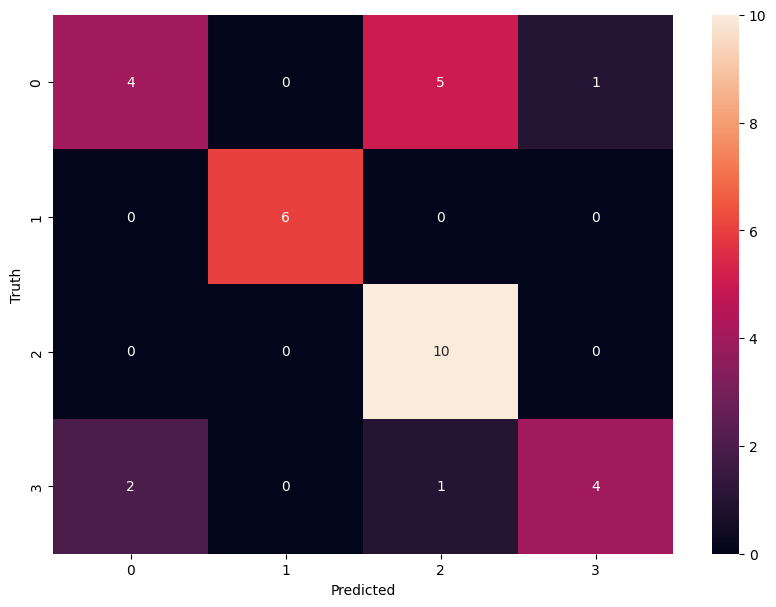

In [50]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [51]:
class_dict

{'cropped': 0, 'harishpics': 1, 'himapics': 2, 'saipics': 3, 'venkypics': 4}